<center><h1>Dambrosio_Taylor_Final_Project</h1></center>

Name: Taylor D'Ambrosio
<br>
Github Username: taylordambrosio

## 1. Transfer Learning for Video Classification

import packages

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import math
import shutil
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.data import AUTOTUNE
from tensorflow.keras.models import Model

#from keras_video import VideoFrameGenerator

### d) Data Exploration and Pre-processing

In [39]:
# Transformations
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='reflect')

# Directories
img_dir = './Data/Sport Images'
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Image size
img_size = (96, 96)

train_frac = 0.7
val_frac = 0.15

for foldername in os.listdir(img_dir):
    folderpath = os.path.join(img_dir, foldername)
    if os.path.isdir(folderpath):
        train_folder = os.path.join(train_dir, foldername)
        val_folder = os.path.join(val_dir, foldername)
        test_folder = os.path.join(test_dir, foldername)
        os.makedirs(train_folder, exist_ok=True)
        os.makedirs(val_folder, exist_ok=True)
        os.makedirs(test_folder, exist_ok=True)

        img_filenames = [f for f in os.listdir(folderpath) if f.endswith('.jpg')]
        num_imgs = len(img_filenames)

        num_train = int(train_frac * num_imgs)
        num_val = int(val_frac * num_imgs)
        num_test = num_imgs - num_train - num_val

        random.shuffle(img_filenames)

        # Put images in each file
        for i, filename in enumerate(img_filenames):
            img_path = os.path.join(folderpath, filename)

            img = cv2.imread(img_path)
            resized_img = cv2.resize(img, img_size)

            if i < num_train:
                dest_folder = train_folder
            elif i < num_train + num_val:
                dest_folder = val_folder
            else:
                dest_folder = test_folder

            # Apply image augmentation to the training set
            if dest_folder == train_folder:
                img_array = np.expand_dims(resized_img, axis=0)
                img_gen = train_datagen.flow(
                    img_array,
                    batch_size=1,
                    save_to_dir=train_folder,
                    save_prefix='aug',
                    save_format='jpg')
                for j in range(10): 
                    img_gen.next()

            else:
                dest_path = os.path.join(dest_folder, filename)
                cv2.imwrite(dest_path, resized_img)

libpng warning: iCCP: known incorrect sRGB profile


#### Using VGG16 Model

Found 37330 images belonging to 5 classes.
Found 1599 images belonging to 5 classes.
Epoch 1/50


2023-05-07 13:06:53.558980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


584/584 [==============================] - ETA: 0s - loss: 0.9726 - accuracy: 0.6425

2023-05-07 13:51:13.523903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


584/584 [==============================] - 2771s 5s/step - loss: 0.9726 - accuracy: 0.6425 - val_loss: 0.8301 - val_accuracy: 0.6942
Epoch 2/50
584/584 [==============================] - 2592s 4s/step - loss: 0.7604 - accuracy: 0.7193 - val_loss: 0.8566 - val_accuracy: 0.6917
Epoch 3/50
584/584 [==============================] - 2319s 4s/step - loss: 0.7005 - accuracy: 0.7425 - val_loss: 0.7438 - val_accuracy: 0.7205
Epoch 4/50
584/584 [==============================] - 2315s 4s/step - loss: 0.6671 - accuracy: 0.7549 - val_loss: 0.7016 - val_accuracy: 0.7405
Epoch 5/50
584/584 [==============================] - 2299s 4s/step - loss: 0.6361 - accuracy: 0.7673 - val_loss: 0.6889 - val_accuracy: 0.7405
Epoch 6/50
584/584 [==============================] - 2264s 4s/step - loss: 0.6128 - accuracy: 0.7746 - val_loss: 0.6927 - val_accuracy: 0.7373
Epoch 7/50
584/584 [==============================] - 2236s 4s/step - loss: 0.6072 - accuracy: 0.7733 - val_loss: 0.6431 - val_accuracy: 0.7717
Epo

2023-05-08 09:12:18.639333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1609/1609 [==============================] - 108s 67ms/step - loss: 0.4375 - accuracy: 0.8322


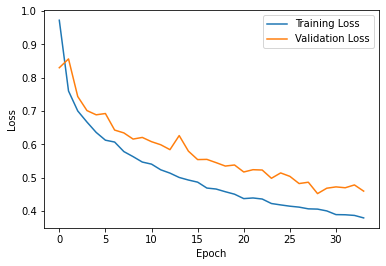

2023-05-08 09:14:41.522840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   2/1609 [..............................] - ETA: 2:03

2023-05-08 09:45:21.322445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1609/1609 [==============================] - 115s 72ms/step
Confusion matrix for training set:
[[1583 1384 1467 1715 1698]
 [1332 1081 1141 1268 1305]
 [1595 1220 1315 1688 1643]
 [1639 1350 1470 1680 1731]
 [1628 1448 1485 1773 1691]]
Confusion matrix for test set:
[[267  14  14  38  11]
 [  5 197   4   7  16]
 [  4   9 287  12  11]
 [ 29   8   6 293  11]
 [  5  28  18  20 295]]
Classification report for training set:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20      7847
           1       0.17      0.18      0.17      6127
           2       0.19      0.18      0.18      7461
           3       0.21      0.21      0.21      7870
           4       0.21      0.21      0.21      8025

    accuracy                           0.20     37330
   macro avg       0.20      0.20      0.20     37330
weighted avg       0.20      0.20      0.20     37330

Classification report for test set:
              precision    recall  f1-score   suppor

In [5]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze layers
for layer in vgg16.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

# Training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Testing model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator)

# Plot
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions
train_predictions = np.argmax(model.predict(train_generator), axis=-1)

test_predictions = np.argmax(model.predict(test_generator), axis=-1)

train_labels = train_generator.classes

test_labels = test_generator.classes

# Confusion Matrix
train_cm = confusion_matrix(train_labels, train_predictions)
print("Confusion matrix for training set:")
print(train_cm)

test_cm = confusion_matrix(test_labels, test_predictions)
print("Confusion matrix for test set:")
print(test_cm)

# Classification report
train_cr = classification_report(train_labels, train_predictions)
print("Classification report for training set:")
print(train_cr)

test_cr = classification_report(test_labels, test_predictions)
print("Classification report for test set:")
print(test_cr)

# Accuracy and F1 score
train_acc = np.sum(train_predictions == train_labels) / len(train_labels)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
print("Accuracy for training set:", train_acc)
print("F1 score for training set:", train_f1)

test_acc = np.sum(test_predictions == test_labels) / len(test_labels)
test_f1 = f1_score(test_labels, test_predictions, average='weighted')
print("Accuracy for test set:", test_acc)
print("F1 score for test set:", test_f1)

#### Using ResNet50 Model

Found 37330 images belonging to 5 classes.
Found 1599 images belonging to 5 classes.
Epoch 1/50


2023-05-08 09:47:24.418953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


584/584 [==============================] - ETA: 0s - loss: 1.4642 - accuracy: 0.3833

2023-05-08 10:02:04.445256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


584/584 [==============================] - 916s 2s/step - loss: 1.4642 - accuracy: 0.3833 - val_loss: 1.4102 - val_accuracy: 0.4284
Epoch 2/50
584/584 [==============================] - 988s 2s/step - loss: 1.3826 - accuracy: 0.4251 - val_loss: 1.5104 - val_accuracy: 0.3627
Epoch 3/50
584/584 [==============================] - 1025s 2s/step - loss: 1.3591 - accuracy: 0.4355 - val_loss: 1.3905 - val_accuracy: 0.4196
Epoch 4/50
584/584 [==============================] - 874s 1s/step - loss: 1.3471 - accuracy: 0.4404 - val_loss: 1.2880 - val_accuracy: 0.4672
Epoch 5/50
584/584 [==============================] - 878s 2s/step - loss: 1.3370 - accuracy: 0.4440 - val_loss: 1.4662 - val_accuracy: 0.4115
Epoch 6/50
584/584 [==============================] - 873s 1s/step - loss: 1.3318 - accuracy: 0.4488 - val_loss: 1.6219 - val_accuracy: 0.3446
Epoch 7/50
584/584 [==============================] - 874s 1s/step - loss: 1.3231 - accuracy: 0.4541 - val_loss: 1.3613 - val_accuracy: 0.4359
Epoch 8/5

2023-05-08 12:03:43.921072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1609/1609 [==============================] - 81s 51ms/step - loss: 1.3101 - accuracy: 0.4618


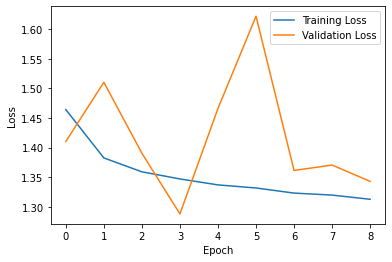

2023-05-08 12:05:06.095326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   3/1609 [..............................] - ETA: 1:37

2023-05-08 12:18:54.646992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1609/1609 [==============================] - 80s 50ms/step
Confusion matrix for training set:
[[1986  694 1972 2292  903]
 [1487  555 1541 1797  747]
 [1873  617 1922 2130  919]
 [2012  652 1989 2220  997]
 [1961  660 2167 2296  941]]
Confusion matrix for test set:
[[117  24  67 110  26]
 [ 19 107  51  34  18]
 [ 36  14 217  42  14]
 [ 52  32  76 171  16]
 [ 59  36 115  25 131]]
Classification report for training set:
              precision    recall  f1-score   support

           0       0.21      0.25      0.23      7847
           1       0.17      0.09      0.12      6127
           2       0.20      0.26      0.23      7461
           3       0.21      0.28      0.24      7870
           4       0.21      0.12      0.15      8025

    accuracy                           0.20     37330
   macro avg       0.20      0.20      0.19     37330
weighted avg       0.20      0.20      0.20     37330

Classification report for test set:
              precision    recall  f1-score   support

In [6]:
# Instantiate ResNet50 pre-trained model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze all layers in the pre-trained model
for layer in resnet50.layers:
    layer.trainable = False

# Add new classification layers on top of the pre-trained model
model = Sequential()
model.add(resnet50)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model with the ADAM optimizer, multinomial cross-entropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

# Set up data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Set up data augmentation for the validation set (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for the training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

# Set up early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model for at least 50 epochs with early stopping
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator)

# Plot the training and validation losses vs. epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the predictions for the training set
train_predictions = np.argmax(model.predict(train_generator), axis=-1)

# Get the predictions for the test set
test_predictions = np.argmax(model.predict(test_generator), axis=-1)

# Get the true labels for the training set
train_labels = train_generator.classes

# Get the true labels for the test set
test_labels = test_generator.classes

# Calculate and print the confusion matrix for the training set
train_cm = confusion_matrix(train_labels, train_predictions)
print("Confusion matrix for training set:")
print(train_cm)

# Calculate and print the confusion matrix for the test set
test_cm = confusion_matrix(test_labels, test_predictions)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate and print the classification report for the training set
train_cr = classification_report(train_labels, train_predictions)
print("Classification report for training set:")
print(train_cr)

# Calculate and print the classification report for the test set
test_cr = classification_report(test_labels, test_predictions)
print("Classification report for test set:")
print(test_cr)

# Calculate and print the accuracy and F1 score for the training set
train_acc = np.sum(train_predictions == train_labels) / len(train_labels)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
print("Accuracy for training set:", train_acc)
print("F1 score for training set:", train_f1)

# Calculate and print the accuracy and F1 score for the test set
test_acc = np.sum(test_predictions == test_labels) / len(test_labels)
test_f1 = f1_score(test_labels, test_predictions, average='weighted')
print("Accuracy for test set:", test_acc)
print("F1 score for test set:", test_f1)

#### Using EfficientNetB0 Model

Found 31728 images belonging to 5 classes.
Found 1163 images belonging to 5 classes.
Epoch 1/50


2023-05-09 13:37:04.130005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


496/496 [==============================] - ETA: 0s - loss: 1.6849 - accuracy: 0.2351

2023-05-09 13:43:57.392271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


496/496 [==============================] - 428s 843ms/step - loss: 1.6849 - accuracy: 0.2351 - val_loss: 1.9836 - val_accuracy: 0.2038
Epoch 2/50
496/496 [==============================] - 435s 877ms/step - loss: 1.6335 - accuracy: 0.2636 - val_loss: 1.9867 - val_accuracy: 0.1393
Epoch 3/50
496/496 [==============================] - 470s 947ms/step - loss: 1.6217 - accuracy: 0.2714 - val_loss: 2.1287 - val_accuracy: 0.1393
Epoch 4/50
496/496 [==============================] - 430s 867ms/step - loss: 1.6045 - accuracy: 0.2771 - val_loss: 2.0927 - val_accuracy: 0.2064
Found 1194 images belonging to 5 classes.
   5/1194 [..............................] - ETA: 33s - loss: 1.9850 - accuracy: 0.0000e+00

2023-05-09 14:06:27.276970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1194/1194 [==============================] - 30s 25ms/step - loss: 1.9696 - accuracy: 0.2102


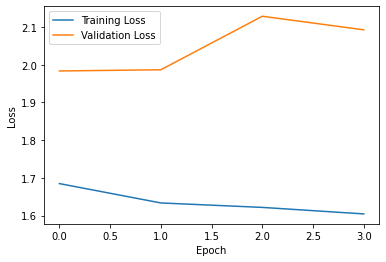

2023-05-09 14:06:57.812317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   6/1194 [..............................] - ETA: 31s

2023-05-09 14:13:33.047914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1194/1194 [==============================] - 29s 24ms/step
Confusion matrix for training set:
[[   0    0    0 7729   22]
 [   0    1    0 5506   11]
 [   0    0    0 5854   21]
 [   0    0    0 6183   18]
 [   0    0    0 6372   11]]
Confusion matrix for test set:
[[  0   0   0 312   0]
 [  0   1   0 162   4]
 [  0   0   0 210   6]
 [  0   0   0 246   0]
 [  0   0   0 249   4]]
Classification report for training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7751
           1       1.00      0.00      0.00      5518
           2       0.00      0.00      0.00      5875
           3       0.20      1.00      0.33      6201
           4       0.13      0.00      0.00      6383

    accuracy                           0.20     31728
   macro avg       0.27      0.20      0.07     31728
weighted avg       0.24      0.20      0.06     31728

Classification report for test set:
              precision    recall  f1-score   support

/Users/taylordambrosio/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taylordambrosio/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taylordambrosio/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [44]:
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze all layers in the pre-trained model
for layer in effnet.layers:
    layer.trainable = False

# Add new classification layers on top of the pre-trained model
model = Sequential()
model.add(effnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model with the ADAM optimizer, multinomial cross-entropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

# Set up data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Set up data augmentation for the validation set (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for the training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical'
)

# Set up early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model for at least 50 epochs with early stopping
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator)

# Plot the training and validation losses vs. epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the predictions for the training set
train_predictions = np.argmax(model.predict(train_generator), axis=-1)

# Get the predictions for the test set
test_predictions = np.argmax(model.predict(test_generator), axis=-1)

# Get the true labels for the training set
train_labels = train_generator.classes

# Get the true labels for the test set
test_labels = test_generator.classes

# Calculate and print the confusion matrix for the training set
train_cm = confusion_matrix(train_labels, train_predictions)
print("Confusion matrix for training set:")
print(train_cm)

# Calculate and print the confusion matrix for the test set
test_cm = confusion_matrix(test_labels, test_predictions)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate and print the classification report for the training set
train_cr = classification_report(train_labels, train_predictions)
print("Classification report for training set:")
print(train_cr)

# Calculate and print the classification report for the test set
test_cr = classification_report(test_labels, test_predictions)
print("Classification report for test set:")
print(test_cr)

# Calculate and print the accuracy and F1 score for the training set
train_acc = np.sum(train_predictions == train_labels) / len(train_labels)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
print("Accuracy for training set:", train_acc)
print("F1 score for training set:", train_f1)

# Calculate and print the accuracy and F1 score for the test set
test_acc = np.sum(test_predictions == test_labels) / len(test_labels)
test_f1 = f1_score(test_labels, test_predictions, average='weighted')
print("Accuracy for test set:", test_acc)
print("F1 score for test set:", test_f1)

#### Links used

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
